# 📚 完整圖像處理學習指南 (Complete Image Processing Learning Guide)

**學習目標:** 從基礎到進階，全面掌握圖像作為數據的概念

**知識路線圖:**
1. 基礎概念：什麼是數位圖像
2. 圖像數據結構：矩陣與像素
3. 顏色空間：RGB與灰度
4. 矩陣操作：切片與編輯
5. 圖像變換：尺寸調整與插值
6. 進階處理：卷積與邊緣檢測

---

## 🔧 必需庫與環境設置

首先了解我們需要的工具包：

In [73]:
# 核心庫導入
import numpy as np              # 數值計算和矩陣操作
import matplotlib.pyplot as plt # 圖像顯示和繪圖
from skimage import data        # 內建範例圖像
import cv2                   # OpenCV圖像處理

print("庫導入成功！")
print(f"NumPy 版本: {np.__version__}")

庫導入成功！
NumPy 版本: 1.26.4


## 1️⃣ 基礎概念：什麼是數位圖像？

### 🎯 關鍵概念
- **像素 (Pixel)**: 圖像的最小單位
- **矩陣表示**: 圖像可以用數字矩陣表示
- **數據類型**: 通常使用 uint8 (0-255)

In [74]:
# 創建一個簡單的 3x3 "圖像"
simple_image = np.array([
    [0,   128, 255],
    [64,  192, 128],
    [255, 0,   64]
], dtype=np.uint8)

print("簡單圖像矩陣:")
print(simple_image)
print(f"形狀: {simple_image.shape}")
print(f"數據類型: {simple_image.dtype}")
print(f"最小值: {simple_image.min()}, 最大值: {simple_image.max()}")

簡單圖像矩陣:
[[  0 128 255]
 [ 64 192 128]
 [255   0  64]]
形狀: (3, 3)
數據類型: uint8
最小值: 0, 最大值: 255


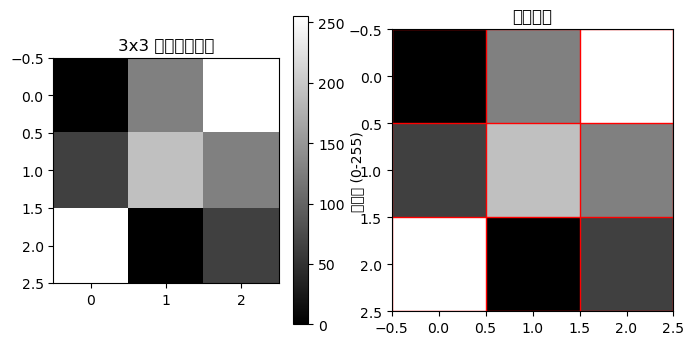

🔍 觀察: 數值越大，像素越亮


In [75]:
# 顯示這個簡單圖像
plt.figure(figsize=(8, 4))

# 左邊：數據視圖
plt.subplot(1, 2, 1)
plt.imshow(simple_image, cmap='gray', vmin=0, vmax=255)
plt.title('3x3 圖像（灰度）')
plt.colorbar(label='像素值 (0-255)')

# plt.imshow() ; 第一個位置的是圖像的數據，也就是顏色的matrix數據
# 右邊：放大視圖
plt.subplot(1, 2, 2)
plt.imshow(simple_image, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
plt.title('放大視圖')

# 添加網格線
for i in range(4):
    plt.axhline(i-0.5, color='red', linewidth=1)
    plt.axvline(i-0.5, color='red', linewidth=1)

# plt.tight_layout()
plt.show()

print("🔍 觀察: 數值越大，像素越亮")

## 2️⃣ 載入真實圖像

### 🎯 關鍵概念
- **skimage.data**: 內建範例圖像
- **astronaut()**: 經典測試圖像
- **shape屬性**: (高度, 寬度, 通道數)

In [78]:
# 載入內建的太空人圖像
astronaut_rgb = data.astronaut()

print("=== 圖像基本資訊 ===")
print(f"形狀: {astronaut_rgb.shape}")  # (高度, 寬度, 通道數)
print(f"數據類型: {astronaut_rgb.dtype}")
print(f"像素值範圍: {astronaut_rgb.min()} - {astronaut_rgb.max()}")
print(f"總像素數: {astronaut_rgb.size}")
print(f"記憶體使用: {astronaut_rgb.nbytes} bytes")

ImportError: cannot import name '_hide_plugin_deprecation_warnings' from 'skimage.io.manage_plugins' (/opt/anaconda3/lib/python3.12/site-packages/skimage/io/manage_plugins.py)

In [ ]:
# 顯示圖像
plt.figure(figsize=(8, 6))
plt.imshow(astronaut_rgb)
plt.title('太空人圖像 (512x512x3)')
plt.axis('off')
plt.show()

print("🚀 這是一個 RGB 彩色圖像！")

## 3️⃣ RGB 顏色空間深度理解

### 🎯 關鍵概念
- **RGB**: Red, Green, Blue 三個顏色通道
- **通道索引**: [:, :, 0] = 紅色, [:, :, 1] = 綠色, [:, :, 2] = 藍色
- **加法混色**: 紅+綠+藍 = 白色

In [ ]:
# 分離 RGB 三個通道
red_channel = astronaut_rgb[:, :, 0]      # 紅色通道
green_channel = astronaut_rgb[:, :, 1]    # 綠色通道
blue_channel = astronaut_rgb[:, :, 2]     # 藍色通道

print("=== RGB 通道資訊 ===")
print(f"紅色通道形狀: {red_channel.shape}")
print(f"綠色通道形狀: {green_channel.shape}")
print(f"藍色通道形狀: {blue_channel.shape}")

In [ ]:
# 分別顯示各個通道
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(astronaut_rgb)
plt.title('原始 RGB 圖像')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('紅色通道')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title('綠色通道')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('藍色通道')
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎨 觀察: 每個通道都是一個灰度圖像")

### 💡 實驗：創建純色圖像

In [ ]:
# 創建純色圖像來理解 RGB
height, width = 100, 100

# 純紅色圖像
pure_red = np.zeros((height, width, 3), dtype=np.uint8)
pure_red[:, :, 0] = 255  # 只有紅色通道有值

# 純綠色圖像
pure_green = np.zeros((height, width, 3), dtype=np.uint8)
pure_green[:, :, 1] = 255  # 只有綠色通道有值

# 純藍色圖像
pure_blue = np.zeros((height, width, 3), dtype=np.uint8)
pure_blue[:, :, 2] = 255  # 只有藍色通道有值

# 混合顏色（黃色 = 紅 + 綠）
yellow = np.zeros((height, width, 3), dtype=np.uint8)
yellow[:, :, 0] = 255  # 紅色
yellow[:, :, 1] = 255  # 綠色

plt.figure(figsize=(16, 4))
colors = [pure_red, pure_green, pure_blue, yellow]
titles = ['純紅色 (255,0,0)', '純綠色 (0,255,0)', '純藍色 (0,0,255)', '黃色 (255,255,0)']

for i, (color, title) in enumerate(zip(colors, titles)):
    plt.subplot(1, 4, i+1)
    plt.imshow(color)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🌈 學習重點: RGB 是加法混色，紅+綠=黃")

## 4️⃣ 灰度轉換深度解析

### 🎯 關鍵概念
- **灰度轉換公式**: Gray = 0.299*R + 0.587*G + 0.114*B
- **權重原理**: 人眼對綠色最敏感，藍色最不敏感
- **np.dot()**: 向量點積運算

In [ ]:
# 標準灰度轉換公式
# 這個公式考慮了人眼對不同顏色的敏感度
weights = [0.299, 0.587, 0.114]  # R, G, B 權重

print("=== 灰度轉換權重 ===")
print(f"紅色權重: {weights[0]} ({weights[0]*100:.1f}%)")
print(f"綠色權重: {weights[1]} ({weights[1]*100:.1f}%)")
print(f"藍色權重: {weights[2]} ({weights[2]*100:.1f}%)")
print(f"總和: {sum(weights)}")

print("\n💡 為什麼這樣分配權重？")
print("- 人眼對綠光最敏感")
print("- 對紅光中等敏感")
print("- 對藍光最不敏感")

In [ ]:
# 步驟1: 分解 np.dot 操作
print("=== 灰度轉換步驟分解 ===")
print(f"原始RGB形狀: {astronaut_rgb.shape}")
print(f"權重陣列形狀: {np.array(weights).shape}")

# 手動計算（慢但清楚）
gray_manual = (
    astronaut_rgb[:, :, 0] * weights[0] +  # R * 0.299
    astronaut_rgb[:, :, 1] * weights[1] +  # G * 0.587  
    astronaut_rgb[:, :, 2] * weights[2]    # B * 0.114
).astype(np.uint8)

# 使用 np.dot（快速）
gray_dot = np.dot(astronaut_rgb[...,:3], weights).astype(np.uint8)

print(f"手動計算結果形狀: {gray_manual.shape}")
print(f"np.dot結果形狀: {gray_dot.shape}")
print(f"兩種方法結果相同: {np.array_equal(gray_manual, gray_dot)}")

In [ ]:
# 比較不同灰度轉換方法
gray_standard = np.dot(astronaut_rgb[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)
gray_average = np.mean(astronaut_rgb, axis=2).astype(np.uint8)  # 簡單平均
gray_max = np.max(astronaut_rgb, axis=2).astype(np.uint8)      # 最大值

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(astronaut_rgb)
plt.title('原始 RGB')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_standard, cmap='gray')
plt.title('標準轉換\n(0.299R+0.587G+0.114B)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gray_average, cmap='gray')
plt.title('平均轉換\n(R+G+B)/3')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gray_max, cmap='gray')
plt.title('最大值轉換\nmax(R,G,B)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("🔍 觀察差異: 標準轉換最自然，保持了視覺對比度")

## 5️⃣ 矩陣切片與圖像區域操作

### 🎯 關鍵概念
- **切片語法**: [行起:行終, 列起:列終, 通道]
- **索引順序**: 先高度(行)，再寬度(列)，最後通道
- **步長操作**: [::2] 表示每隔一個取樣

In [ ]:
# 使用標準灰度圖像進行後續操作
gray_img = np.dot(astronaut_rgb[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

print("=== 基本切片操作 ===")
print(f"完整圖像形狀: {gray_img.shape}")

# 提取不同大小的區域
patch_3x3 = gray_img[:3, :3]           # 左上角 3x3
patch_10x10 = gray_img[:10, :10]       # 左上角 10x10  
center_50x50 = gray_img[231:281, 231:281]  # 中心 50x50

print(f"3x3 區域形狀: {patch_3x3.shape}")
print(f"10x10 區域形狀: {patch_10x10.shape}")
print(f"中心50x50區域形狀: {center_50x50.shape}")

print("\n=== 3x3區域的實際數值 ===")
print(patch_3x3)

In [ ]:
# 視覺化不同區域
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('完整圖像 (512x512)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(patch_10x10, cmap='gray')
plt.title('左上角 10x10')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(center_50x50, cmap='gray')
plt.title('中心區域 50x50')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(patch_3x3, cmap='gray', interpolation='nearest')
plt.title('左上角 3x3 (放大)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 💡 進階切片操作

In [ ]:
# 步長切片 - 降采樣
downsampled_2x = gray_img[::2, ::2]  # 每隔一個像素取樣
downsampled_4x = gray_img[::4, ::4]  # 每隔四個像素取樣

print("=== 降采樣結果 ===")
print(f"原始: {gray_img.shape}")
print(f"2x降采樣: {downsampled_2x.shape}")
print(f"4x降采樣: {downsampled_4x.shape}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title(f'原始 {gray_img.shape}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(downsampled_2x, cmap='gray')
plt.title(f'2x降采樣 {downsampled_2x.shape}')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(downsampled_4x, cmap='gray')
plt.title(f'4x降采樣 {downsampled_4x.shape}')
plt.axis('off')

plt.tight_layout()
plt.show()

print("📊 觀察: 步長切片是一種簡單的降采樣方法")

## 6️⃣ 通道編輯與顏色操作

### 🎯 關鍵概念
- **.copy()**: 創建副本避免修改原圖
- **通道索引**: [:, :, channel_index]
- **顏色效果**: 移除通道產生的視覺效果

In [ ]:
# 理解 .copy() 的重要性
print("=== .copy() 重要性演示 ===")

# 錯誤方式 - 直接賦值（會修改原圖）
img_wrong = astronaut_rgb  # 這不是複製！
print(f"原圖ID: {id(astronaut_rgb)}")
print(f"錯誤方式ID: {id(img_wrong)}")
print(f"是同一個物件: {img_wrong is astronaut_rgb}")

# 正確方式 - 使用 .copy()
img_correct = astronaut_rgb.copy()
print(f"正確方式ID: {id(img_correct)}")
print(f"是同一個物件: {img_correct is astronaut_rgb}")
print(f"內容相同: {np.array_equal(img_correct, astronaut_rgb)}")

In [ ]:
# 系統性地移除每個顏色通道
img_no_red = astronaut_rgb.copy()
img_no_red[:, :, 0] = 0  # 移除紅色通道

img_no_green = astronaut_rgb.copy() 
img_no_green[:, :, 1] = 0  # 移除綠色通道

img_no_blue = astronaut_rgb.copy()
img_no_blue[:, :, 2] = 0  # 移除藍色通道

plt.figure(figsize=(20, 5))

images = [astronaut_rgb, img_no_red, img_no_green, img_no_blue]
titles = ['原始圖像', '移除紅色\n(青色調)', '移除綠色\n(洋紅色調)', '移除藍色\n(黃色調)']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🎨 學習重點:")
print("- 移除紅色 → 青色調 (綠+藍)")
print("- 移除綠色 → 洋紅色調 (紅+藍)")
print("- 移除藍色 → 黃色調 (紅+綠)")

### 💡 進階通道操作

In [ ]:
# 通道增強和減弱
img_enhance_red = astronaut_rgb.copy().astype(np.float32)
img_enhance_red[:, :, 0] *= 1.5  # 增強紅色
img_enhance_red = np.clip(img_enhance_red, 0, 255).astype(np.uint8)

img_reduce_green = astronaut_rgb.copy().astype(np.float32)
img_reduce_green[:, :, 1] *= 0.5  # 減弱綠色
img_reduce_green = np.clip(img_reduce_green, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(astronaut_rgb)
plt.title('原始圖像')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_enhance_red)
plt.title('增強紅色 (x1.5)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_reduce_green)
plt.title('減弱綠色 (x0.5)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("⚡ 注意: 使用 np.clip() 防止像素值超出 0-255 範圍")

## 7️⃣ 圖像尺寸調整與插值方法

### 🎯 關鍵概念
- **cv2.resize()**: OpenCV的調整尺寸函數
- **(width, height)**: OpenCV使用寬度優先的順序
- **插值方法**: 如何填補新像素值

In [ ]:
print("=== OpenCV 尺寸調整基礎 ===")
print(f"原始圖像形狀: {astronaut_rgb.shape}")
print("注意: OpenCV 使用 (寬度, 高度) 順序")
print("NumPy 使用 (高度, 寬度) 順序")

# 不同尺寸的調整
sizes = [(32, 32), (128, 128), (256, 256)]
resized_images = []

for width, height in sizes:
    resized = cv2.resize(astronaut_rgb, (width, height), interpolation=cv2.INTER_NEAREST)
    resized_images.append(resized)
    print(f"調整到 {width}x{height}: 形狀 = {resized.shape}")

In [ ]:
# 比較不同尺寸
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(astronaut_rgb)
plt.title(f'原始\n{astronaut_rgb.shape[1]}x{astronaut_rgb.shape[0]}')
plt.axis('off')

for i, (resized, (w, h)) in enumerate(zip(resized_images, sizes)):
    plt.subplot(1, 4, i+2)
    plt.imshow(resized)
    plt.title(f'{w}x{h}\n像素總數: {w*h}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("📏 解析度與清晰度關係: 像素越多，圖像越清晰")

### 💡 插值方法深度比較

In [ ]:
# 不同插值方法比較
interpolations = [
    (cv2.INTER_NEAREST, 'NEAREST\n最近邻插值'),
    (cv2.INTER_LINEAR, 'LINEAR\n双线性插值'),
    (cv2.INTER_CUBIC, 'CUBIC\n双三次插值'),
    (cv2.INTER_LANCZOS4, 'LANCZOS4\nLanczos插值')
]

target_size = (64, 64)  # 先縮小
enlarged_size = (256, 256)  # 再放大，看插值效果

# 先將圖像縮小到64x64
small_img = cv2.resize(astronaut_rgb, target_size, interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(20, 5))

for i, (method, name) in enumerate(interpolations):
    # 將小圖像放大，觀察插值效果
    enlarged = cv2.resize(small_img, enlarged_size, interpolation=method)
    
    plt.subplot(1, 4, i+1)
    plt.imshow(enlarged)
    plt.title(name)
    plt.axis('off')

plt.suptitle('不同插值方法比較 (64x64 → 256x256)', fontsize=16)
plt.tight_layout()
plt.show()

print("🔍 插值方法特點:")
print("- NEAREST: 最快，但會有鋸齒狀效果")
print("- LINEAR: 平滑，速度中等")
print("- CUBIC: 更平滑，但可能過度平滑")
print("- LANCZOS4: 保持細節最好，但計算最慢")

### 📊 性能測試

In [ ]:
import time

# 測試不同插值方法的速度
test_size = (256, 256)
num_runs = 10

print("=== 插值方法性能測試 ===")

for method, name in interpolations:
    start_time = time.time()
    
    for _ in range(num_runs):
        _ = cv2.resize(astronaut_rgb, test_size, interpolation=method)
    
    end_time = time.time()
    avg_time = (end_time - start_time) / num_runs * 1000  # 毫秒
    
    print(f"{name.split()[0]:12s}: {avg_time:.2f} ms")

print(f"\n測試條件: {num_runs} 次運行，目標尺寸 {test_size}")

## 8️⃣ 卷積運算基礎理論

### 🎯 關鍵概念
- **卷積核 (Kernel)**: 小矩陣，定義運算規則
- **滑動窗口**: 核在圖像上移動
- **元素積求和**: 對應元素相乘再求和

In [ ]:
# 創建一個簡單的測試圖像
simple_test = np.array([
    [1, 2, 3, 0, 1],
    [4, 5, 6, 1, 2], 
    [7, 8, 9, 2, 3],
    [1, 2, 3, 3, 4],
    [4, 5, 6, 4, 5]
], dtype=np.float32)

# 簡單的 3x3 核
simple_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], dtype=np.float32)

print("=== 卷積運算示例 ===")
print("測試圖像 (5x5):")
print(simple_test)
print("\n卷積核 (3x3):")
print(simple_kernel)

print("\n💡 卷積運算: 核在圖像上滑動，逐點計算")

In [ ]:
# 手動演示單次卷積計算
print("=== 單次卷積計算演示 ===")
print("提取左上角 3x3 區域:")
region = simple_test[0:3, 0:3]
print(region)

print("\n卷積核:")
print(simple_kernel)

print("\n逐元素相乘:")
element_wise = region * simple_kernel
print(element_wise)

print(f"\n求和結果: {np.sum(element_wise)}")
print("這就是輸出圖像在位置 (0,0) 的值")

# 詳細分解
print("\n🔍 詳細計算:")
total = 0
for i in range(3):
    for j in range(3):
        product = region[i,j] * simple_kernel[i,j]
        total += product
        print(f"({region[i,j]} × {simple_kernel[i,j]}) = {product}")

print(f"總和: {total}")

### 💡 實現完整卷積函數

In [ ]:
def conv2d_detailed(img2d, kernel3x3):
    """
    詳細的2D卷積實現，包含說明
    """
    h, w = img2d.shape
    print(f"輸入圖像大小: {h}x{w}")
    
    # 零填充
    padded = np.pad(img2d.astype(np.float32), ((1,1),(1,1)), mode='constant')
    print(f"填充後大小: {padded.shape}")
    
    # 輸出圖像
    output = np.zeros((h, w), dtype=np.float32)
    kernel = kernel3x3.astype(np.float32)
    
    print("\n開始卷積計算...")
    
    # 卷積運算
    for i in range(h):
        for j in range(w):
            # 提取3x3區域
            region = padded[i:i+3, j:j+3]
            # 計算卷積
            output[i,j] = np.sum(region * kernel)
            
            # 只顯示前幾個計算過程
            if i < 2 and j < 2:
                print(f"位置({i},{j}): {np.sum(region * kernel):.2f}")
    
    return output

# 測試詳細卷積
result_detailed = conv2d_detailed(simple_test, simple_kernel)
print(f"\n卷積結果形狀: {result_detailed.shape}")

In [ ]:
# 視覺化卷積過程
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(simple_test, cmap='viridis')
plt.title('原始圖像')
plt.colorbar()

plt.subplot(1, 4, 2)
plt.imshow(simple_kernel, cmap='RdBu')
plt.title('卷積核')
plt.colorbar()

plt.subplot(1, 4, 3)
plt.imshow(result_detailed, cmap='viridis')
plt.title('卷積結果')
plt.colorbar()

plt.subplot(1, 4, 4)
plt.imshow(np.abs(result_detailed), cmap='hot')
plt.title('絕對值結果')
plt.colorbar()

plt.tight_layout()
plt.show()

print("🎯 觀察: 卷積核檢測了垂直邊緣特徵")

## 9️⃣ 經典邊緣檢測濾波器

### 🎯 關鍵概念
- **Sobel 濾波器**: 檢測水平或垂直邊緣
- **Laplacian 濾波器**: 檢測所有方向的邊緣
- **梯度概念**: 像素值變化率

In [ ]:
# 定義經典濾波器
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

laplacian = np.array([[0,  1, 0],
                      [1, -4, 1],
                      [0,  1, 0]], dtype=np.float32)

edge_detection = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]], dtype=np.float32)

print("=== 經典邊緣檢測濾波器 ===")
print("Sobel X (垂直邊緣檢測):")
print(sobel_x)
print("\nSobel Y (水平邊緣檢測):")
print(sobel_y)
print("\nLaplacian (全方向邊緣):")
print(laplacian)
print("\nEdge Detection (銳化邊緣):")
print(edge_detection)

In [ ]:
# 使用原本的高效卷積函數
def conv2d_same(img2d, kernel3x3):
    """高效的2D卷積實現"""
    h, w = img2d.shape
    out = np.zeros((h, w), dtype=np.float32)
    pad = np.pad(img2d.astype(np.float32), ((1,1),(1,1)), mode='constant')
    k = kernel3x3.astype(np.float32)
    for i in range(h):
        for j in range(w):
            region = pad[i:i+3, j:j+3]
            out[i,j] = np.sum(region * k)
    return out

# 使用標準灰度圖像
gray_img = np.dot(astronaut_rgb[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

# 應用不同濾波器
edge_sobel_x = conv2d_same(gray_img, sobel_x)
edge_sobel_y = conv2d_same(gray_img, sobel_y)
edge_laplacian = conv2d_same(gray_img, laplacian)
edge_enhance = conv2d_same(gray_img, edge_detection)

print("所有濾波器應用完成！")

In [ ]:
# 視覺化所有邊緣檢測結果
plt.figure(figsize=(20, 10))

# 原始圖像
plt.subplot(2, 4, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('原始灰度圖像')
plt.axis('off')

# Sobel X
plt.subplot(2, 4, 2)
plt.imshow(edge_sobel_x, cmap='gray')
plt.title('Sobel X\n(垂直邊緣)')
plt.axis('off')

# Sobel Y  
plt.subplot(2, 4, 3)
plt.imshow(edge_sobel_y, cmap='gray')
plt.title('Sobel Y\n(水平邊緣)')
plt.axis('off')

# Sobel組合
sobel_combined = np.sqrt(edge_sobel_x**2 + edge_sobel_y**2)
plt.subplot(2, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel 組合\n√(X²+Y²)')
plt.axis('off')

# Laplacian
plt.subplot(2, 4, 5)
plt.imshow(edge_laplacian, cmap='gray')
plt.title('Laplacian\n(全方向邊緣)')
plt.axis('off')

# Edge Enhancement
plt.subplot(2, 4, 6)
plt.imshow(edge_enhance, cmap='gray')
plt.title('邊緣增強')
plt.axis('off')

# Laplacian 絕對值
plt.subplot(2, 4, 7)
plt.imshow(np.abs(edge_laplacian), cmap='gray')
plt.title('Laplacian\n(絕對值)')
plt.axis('off')

# 綜合邊緣
combined_edges = sobel_combined + np.abs(edge_laplacian)
plt.subplot(2, 4, 8)
plt.imshow(combined_edges, cmap='gray')
plt.title('綜合邊緣\n(Sobel + Laplacian)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("🔍 比較不同濾波器的效果:")
print("- Sobel X: 強調垂直線條")
print("- Sobel Y: 強調水平線條")
print("- Laplacian: 檢測所有方向的邊緣")
print("- 組合方法: 獲得更完整的邊緣資訊")

## 🔟 實戰練習與應用

現在我們來綜合應用學到的知識！

In [ ]:
# 練習1: 創建自己的濾波器
print("=== 練習1: 創建自定義濾波器 ===")

# 模糊濾波器
blur_kernel = np.ones((3,3), dtype=np.float32) / 9.0
print("模糊濾波器:")
print(blur_kernel)

# 銳化濾波器
sharpen_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype=np.float32)
print("\n銳化濾波器:")
print(sharpen_kernel)

# 應用濾波器
blurred = conv2d_same(gray_img, blur_kernel)
sharpened = conv2d_same(gray_img, sharpen_kernel)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('原始圖像')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('模糊效果')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('銳化效果')
plt.axis('off')

plt.tight_layout()
plt.show()

print("✨ 嘗試修改核的數值，觀察不同效果！")

In [ ]:
# 練習2: 組合多種處理
print("=== 練習2: 組合圖像處理 ===")

# 處理流水線
# 1. 調整大小
resized = cv2.resize(astronaut_rgb, (256, 256), interpolation=cv2.INTER_LINEAR)

# 2. 轉換為灰度
gray_resized = np.dot(resized[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

# 3. 應用邊緣檢測
edges = conv2d_same(gray_resized, sobel_x)

# 4. 後處理 - 閾值化
threshold = np.percentile(np.abs(edges), 85)  # 85% 百分位數
binary_edges = (np.abs(edges) > threshold).astype(np.uint8) * 255

plt.figure(figsize=(16, 4))

processing_steps = [
    (resized, 'Step 1: 調整大小\n256x256'),
    (gray_resized, 'Step 2: 灰度轉換'), 
    (np.abs(edges), 'Step 3: 邊緣檢測'),
    (binary_edges, 'Step 4: 二值化')
]

for i, (img, title) in enumerate(processing_steps):
    plt.subplot(1, 4, i+1)
    if i == 0:  # RGB圖像
        plt.imshow(img)
    else:  # 灰度圖像
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"🎯 處理結果: 閾值 = {threshold:.2f}")
print(f"二值化後邊緣像素數: {np.sum(binary_edges > 0)}")

## 📋 知識點總結與檢查清單

### ✅ 基礎概念
- [ ] 理解圖像作為數值矩陣的概念
- [ ] 掌握像素值範圍 (0-255) 和數據類型 (uint8)
- [ ] 了解圖像形狀 (高度, 寬度, 通道數)

### ✅ RGB 和灰度轉換
- [ ] 理解 RGB 三通道結構
- [ ] 掌握灰度轉換公式和權重原理
- [ ] 會使用 np.dot() 進行高效轉換

### ✅ 矩陣操作
- [ ] 熟練使用切片語法 [行, 列, 通道]
- [ ] 理解 .copy() 的重要性
- [ ] 掌握通道編輯和顏色操作

### ✅ 尺寸調整
- [ ] 了解 cv2.resize() 的參數順序
- [ ] 理解不同插值方法的特點和適用場景
- [ ] 能權衡速度和質量選擇插值方法

### ✅ 卷積和濾波
- [ ] 理解卷積運算的數學原理
- [ ] 掌握填充(padding)的作用
- [ ] 熟悉經典濾波器 (Sobel, Laplacian)
- [ ] 能設計自定義濾波器

In [ ]:
# 最終測驗: 綜合應用
print("=== 🎓 最終測驗 ===")
print("嘗試完成以下任務:")
print("1. 載入太空人圖像")
print("2. 分別移除 R, G, B 通道並顯示")
print("3. 轉換為灰度圖像")
print("4. 調整為 128x128 尺寸")
print("5. 應用 Laplacian 邊緣檢測")
print("6. 將結果可視化")

# 你的代碼寫在這裡
# ...

print("\n🌟 恭喜！你已經掌握了圖像處理的核心概念！")
print("\n🚀 下一步學習建議:")
print("- 學習更多濾波器類型 (Gaussian, Median)")
print("- 了解形態學操作 (erosion, dilation)")
print("- 探索特徵提取方法")
print("- 學習深度學習在圖像處理中的應用")

## 🔗 重要關鍵字速查表

| 關鍵字 | 功能 | 示例 |
|--------|------|------|
| `data.astronaut()` | 載入內建圖像 | `img = data.astronaut()` |
| `.shape` | 獲取矩陣維度 | `height, width, channels = img.shape` |
| `.dtype` | 數據類型 | `print(img.dtype)  # uint8` |
| `[:, :, 0]` | 紅色通道 | `red = img[:, :, 0]` |
| `[:, :, 1]` | 綠色通道 | `green = img[:, :, 1]` |
| `[:, :, 2]` | 藍色通道 | `blue = img[:, :, 2]` |
| `.copy()` | 創建副本 | `img_copy = img.copy()` |
| `np.dot()` | 向量點積 | `gray = np.dot(img, [0.299, 0.587, 0.114])` |
| `cv2.resize()` | 調整尺寸 | `small = cv2.resize(img, (64, 64))` |
| `INTER_NEAREST` | 最近邻插值 | `cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)` |
| `INTER_LINEAR` | 雙線性插值 | `cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)` |
| `np.pad()` | 邊界填充 | `padded = np.pad(img, ((1,1),(1,1)), mode='constant')` |
| `plt.imshow()` | 顯示圖像 | `plt.imshow(img, cmap='gray')` |

---

**🎯 學習完成標誌**: 當你能夠不查閱筆記，獨立完成一個完整的圖像處理流程時，就說明你已經掌握了這些核心概念！

**💡 記住**: 實踐是最好的老師，多動手嘗試不同的參數和組合！